# Actividad Evaluada Taller de Series de Tiempo

NOMBRE: Pablo Ignacio Rojas torres

Correo electrónico: pabrojast@udd.cl




# Instrucciones

- Desarrolle en un notebook los siguientes análisis, este puede ser de **manera individual o en grupo de hasta 3 personas**.
- Realice una copia de este acrvivo, cambiele el nombre y edítela directamente.
- Apóyese en el resto de material disponible, si tiene dudas puede realizarlas al correo  moyarzunw@udd.cl con el asunto "Dudas taller series de tiempo IDS"
- La **entrega** es hasta el día jueves 16 DIC en el correo: moyarzunw@udd.cl, 
    -  Enviar por correo con el asunto: Tarea taller serie de tiempo IDS,  nombre apellido
    -  El notebook debe tener el nombre: Notebook- taller-alicacion-nombre-apellido.ipnyb, 
    -  Tambien puede enviarme un link en github si está publico o me concede acceso.

# Evaluación:

El taller será evaluado con nota 1 a 7, en base al notebook enviado. La pauta de evaluación es la siguiente:

- Punto base (1pt)
- Entrega a tiempo y ordenada (1pt)
- Entrega completa de la actividad desarrollada, independiente de los resultadps (2pts)
- Resultados correctos (2pts)
- Integridad del codigo: Se refiere a que el codigo se pueda ejecutar sin intervencion del docente (1pts)

# Generalidades

**Resultado de aprendizaje esperado:**

1. Identificar datos de series temporales y sus particularidades, para entender posibles aplicaciones profesionales.

2. Describir exploratoriamente una serie temporal, para extraer características claves del fenómeno que permita su modelamiento.

3. Modelar series temporales, evaluando alternativas.


**Bibliografía recomendada:**

Stock & Watson, C.14 [link](https://www.dropbox.com/s/d09qcat340jy5q2/stock%20y%20watson%20-%20Introduccion%20a%20la%20Econometria.pdf?dl=0) ; Wooldridge, c.12 [link](https://www.dropbox.com/s/wrh0tuna27qp747/Wooldridge__Introductory_Econometrics_2nd_Ed_Solutions.pdf?dl=0), Gujarati, c.12  [link](https://www.dropbox.com/s/rrvth8vsa1c5gts/Gujarati-cap%2012.pdf?dl=0)

**Material de apoyo***

El taller cuenta con un repositorio  [https://github.com/melanieoyarzun/taller_IDS2021](https://github.com/melanieoyarzun/taller_IDS2021) en el cual está dispoinible todo el material.



In [1]:
# Paquetes y settings recomendados, pero puedes cambiar lo que quieras

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#import watermark


import sklearn
from sklearn.linear_model import LinearRegression

import scipy
from scipy import stats

#%matplotlib inline
#%load_ext watermark

# setting de graficos

plt.figure(figsize=(5,3), dpi= 200, facecolor='w', edgecolor='k')



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
#%watermark -n -v -m -g -iv

# Actividad Bloque 1:

1. Siga este ejemplo practico de importar datos desde la API del Banco Mundial y preparar la base para su análisis de series de tiempo.
2. Importe usted la serie de GDP total Y Percapita para otro país serie desde la API del Banco mundial, muestre sus principales características y realice un grafico. 
3. Obtenga las primeras diferencias y compare, ¿pareciera haber tendencias?


In [3]:
from pandas_datareader import data, wb

In [4]:
wb.search('gdp')


,id,name,unit,source,sourceNote,sourceOrganization,topics
711,5.51.01.10.gdp,Per capita GDP growth,,Statistical Capacity Indicators,GDP per capita is the sum of gross value added...,b'World Development Indicator (WDI) databank. ...,
713,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
714,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
715,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
...,...,...,...,...,...,...,...
16297,UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16298,UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",b'UNESCO Institute for Statistics',
16299,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
16300,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',


In [5]:
# Obtengamos la lista de paises disponibles
countries=wb.get_countries()

#Preview primeras filas lista de paises
countries[:15]

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.51670
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.52280
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
5,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IBRD,Luanda,13.2420,-8.81155
6,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,41.33170
7,AND,AD,Andorra,Europe & Central Asia,,High income,Not classified,Andorra la Vella,1.5218,42.50750
8,ARB,1A,Arab World,Aggregates,,Aggregates,Aggregates,,NaN,NaN
9,ARE,AE,United Arab Emirates,Middle East & North Africa,,High income,Not classified,Abu Dhabi,54.3705,24.47640


In [6]:
#sabemos que queremos Argentina, asi que busquemos su info
countries[ countries['name'] == 'Argentina' ]

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
10,ARG,AR,Argentina,Latin America & Caribbean,Latin America & Caribbean (excluding high income),Upper middle income,IBRD,Buenos Aires,-58.4173,-34.6118


In [7]:
# Descarguemos la data desde la API del banco mundial a un dataframe
#GDP

df_GPD_AR = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.MKTP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=['AR'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )


#percapita
df_GPDpc_AR = wb.download(
                    #Use the indicator attribute to identify which indicator or indicators to download
                    indicator='NY.GDP.PCAP.KD',
                    #Use the country attribute to identify the countries you want data for
                    country=['AR'],
                    #Identify the first year for which you want the data, as an integer or a string
                    start='1980',
                    #Identify the last year for which you want the data, as an integer or a string
                    end=2020
                )

df_GPDpc_AR.info()
df_GPD_AR.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41 entries, ('Argentina', '2020') to ('Argentina', '1980')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NY.GDP.PCAP.KD  41 non-null     float64
dtypes: float64(1)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41 entries, ('Argentina', '2020') to ('Argentina', '1980')
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NY.GDP.MKTP.KD  41 non-null     float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [8]:
#PIB per capita data frame
df_GPDpc_AR.head()

NY.GDP.PCAP.KD
country   year                
Argentina 2020    11342.021824
          2019    12711.705187
          2018    13112.401134
          2017    13595.037355
          2016    13360.211835

In [9]:
#PIB data frame
df_GPD_AR.head()

NY.GDP.MKTP.KD
country   year                
Argentina 2020    5.147724e+11
          2019    5.713045e+11
          2018    5.831181e+11
          2017    5.987909e+11
          2016    5.823766e+11

In [10]:
#ordenando el index simplemente, para ambos df
df_GPD_AR.sort_index(inplace=True)
df_GPD_AR = df_GPD_AR.droplevel('country')

df_GPDpc_AR.sort_index(inplace=True)
df_GPDpc_AR = df_GPDpc_AR.droplevel('country')


Text(0.5, 0, 'Año')

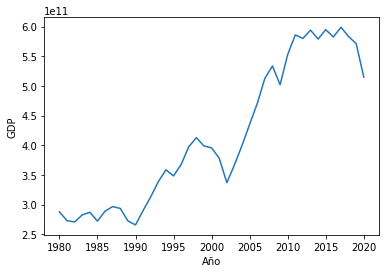

In [11]:
# Graficamos

ax = df_GPD_AR['1980':].plot(legend=False) 
ax.set_ylabel(r'GDP')
ax.set_xlabel(r'Año')


Text(0.5, 0, 'Año')

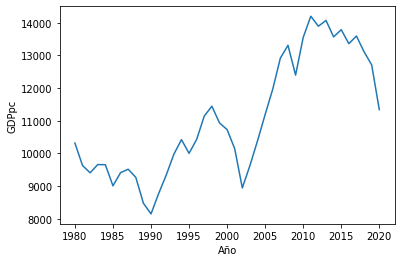

In [12]:
# Graficamos

ax = df_GPDpc_AR['1980':].plot(legend=False) 
ax.set_ylabel(r'GDPpc')
ax.set_xlabel(r'Año')


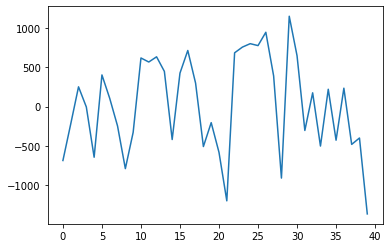

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
values = df_GPDpc_AR['NY.GDP.PCAP.KD'].values
detrended = values[1:]-values[:-1]
plt.plot(detrended)

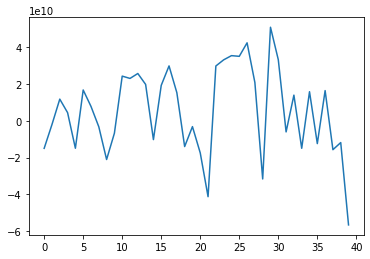

In [14]:
values = df_GPD_AR['NY.GDP.MKTP.KD'].values
detrended = values[1:]-values[:-1]
plt.plot(detrended)

#comentario
Se ve que los datos tienen tendencia

# Actividad Bloque 2: 

Considere el mecanismo para extraer datos de la sección anterior. Elija un país a analizar y realice las siguientes operaciones.

1. Calule $y_t=ln(GDP_t)$, que es el logaritmo del PIB real y $\Delta y_t$ como la tasa de crecimiento anual del PIB para el periodo. 
2. Estime la media de $\Delta y_t$
3. Estme la desviación estandar de $\Delta y_t$
4. Estime las cuatro primeras autocorrelaciones de $\Delta y_t$, ¿cuales son las unidades de medidas de estas autocorrelaciones?
5. Estime un modelo AR(1) para $\Delta y_t$. ¿Cual es el coeficiente para el vector autorregresivo? ¿Es estadisticamente significativo? Construya un intervalo de confianza para el estimador poblacional.
6. Estime un modelo AR(2) para $\Delta y_t$. ¿Cual es el coeficiente para el vector autorregresivo? ¿Es estadisticamente significativo? Construya un intervalo de confianza para el estimador poblacional.
7. Estime un modelo AR(3) y AR(4) para $\Delta y_t$. Utilice el criterio BIC y AIC para elegir el numero de rezagos.
8. Utilice un estadístico de Dickey- FUlller aumentado para contrastar la presencia de raiz unitaria. Como alternativa, suponga que Y es estacionaria al rededor de una detendecia determinística.
9.  Identifique la tendencia y posible estacionalidad y haga la descomposción grafica.
10. ¿Podría existir un quiebre estructural en 2009? ¿Cómo lo probaría?


In [15]:
#1
import numpy as np
#np.log es ln
y = df_GPD_AR['NY.GDP.MKTP.KD'].values
yt = np.log(y)
y_rate = []

for rate in range(1, len(y)):
  temp_rate = ((y[rate] - y[rate-1]) * 100.0 / y[rate-1])
  y_rate.append(temp_rate)
y_rate

yt_rate = []
for rate in range(1, len(yt)):
  temp_rate = ((yt[rate] - yt[rate-1]) * 100.0 / yt[rate-1])
  yt_rate.append(temp_rate)
yt_rate

[-0.20197728967777073,
 -0.02804070119527932,
 0.16171608673367793,
 0.05910784462086656,
 -0.20196600571957574,
 0.22679494142457413,
 0.1011358728963124,
 -0.0414864177729813,
 -0.28123029836962915,
 -0.0948750222454991,
 0.33223561449425987,
 0.2893906349723078,
 0.2979830661468764,
 0.21365405853186556,
 -0.10849168433753183,
 0.202410189149786,
 0.29285621528269756,
 0.14145036925841842,
 -0.12876959995669407,
 -0.02965471284773879,
 -0.16885184637233433,
 -0.43268791008251195,
 0.3190311256058321,
 0.32465405284623566,
 0.3174902105774468,
 0.28880438197814196,
 0.32090217259243375,
 0.14750202222949252,
 -0.22593667520721233,
 0.35799341227849046,
 0.21564414367601806,
 -0.03807599261314462,
 0.0877515808092404,
 -0.09386680524776876,
 0.0994861656818295,
 -0.0775419595519085,
 0.102601505566007,
 -0.09780376666247904,
 -0.07554864014801581,
 -0.38490188582822066]

In [16]:
#2
np.mean(yt_rate)

0.05472221133791287

In [17]:
#3
np.std(yt_rate)

0.21293434725081595

In [18]:
#4
def pearson(x, y):
  meanx = np.mean(x)
  meany = np.mean(y)
  stdx = np.std(x)
  stdy = np.std(y)  
  return np.mean((x - meanx) * (y - meany)) / (stdx * stdy)

def acf(x, lag=40):
    return np.array([1] + [pearson(x[:-i], x[i:]) for i in range(1, lag)])

acf(yt_rate, 4)

array([ 1.        ,  0.25659658, -0.0521673 , -0.05855021])

In [19]:
#actualizamos statsmodels para poder importar  ar_model
#solo una vez necesario
#!pip install statsmodels --upgrade
#import os
#def restart_runtime():
#  os.kill(os.getpid(), 9)
#restart_runtime()

In [20]:
#5
#https://vitalflux.com/autoregressive-ar-models-with-python-examples/

#
# Instantiate and fit the AR model with training data
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(yt_rate, lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   40
Model:                     AutoReg(1)   Log Likelihood                   6.560
Method:               Conditional MLE   S.D. of innovations              0.205
Date:                Sun, 19 Dec 2021   AIC                             -7.121
Time:                        00:52:31   BIC                             -2.130
Sample:                             1   HQIC                            -5.330
                                   40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0437      0.034      1.269      0.204      -0.024       0.111
y.L1           0.2668      0.161      1.658      0.097      -0.049       0.582
                                    Roots           

#Coeficiente
El coeficiente corresponde a 0.2676, mientras que la constante corresponde a 0.0436. Por otro lado, para un intervalo de cofinanza del 95% la constante es significativa, mientras que y.L1 es rechazada.

In [21]:
#from https://www.cienciadedatos.net/documentos/pystats04-bootstrapping-python.html
from tqdm import tqdm

def calcular_estadistico(x):
    '''
    Función para calcular el estadístico de interés.
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
         
    Returns
    -------
    estadístico: float
        valor del estadístico.
    '''
    estadistico = np.mean(x)
    
    return(estadistico)


def bootstraping(x, fun_estadistico, n_iteraciones=9999):
    '''
    Función para calcular el valor del estadístico en múltiples muestras generadas
    mediante muestreo repetido con reposición (bootstrapping).
    
    Parameters
    ----------
    x : numpy array
         valores de la muestra.
 
    fun_estadistico : function
        función que recibe como argumento una muestra y devuelve el valor
        del estadístico.
        
    n_iteraciones : int
        número iteraciones (default `9999`).
        
    Returns
    -------
    distribuciones: numpy array
        valor del estadístico en cada muestra de bootstrapping.
    '''
    
    n = len(x)
    dist_boot = np.full(shape=n_iteraciones, fill_value=np.nan)
    
    for i in tqdm(range(n_iteraciones)):
        resample = np.random.choice(x, size=n, replace=True)
        dist_boot[i] = fun_estadistico(resample)
        
    return dist_boot

In [22]:
dist_boot = bootstraping(
                x = yt_rate,
                fun_estadistico = calcular_estadistico,
                n_iteraciones   = 9999
            )

100%|██████████| 9999/9999 [00:00<00:00, 13825.12it/s]


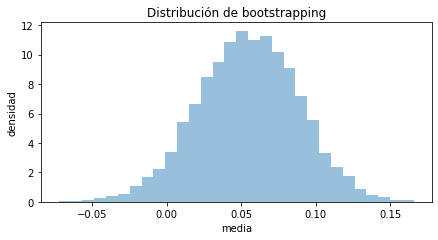

In [23]:
# Distribución de bootstrapping
# ==============================================================================
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(dist_boot, bins=30, density=True, color='#3182bd', alpha=0.5)
ax.set_title('Distribución de bootstrapping')
ax.set_xlabel('media')
ax.set_ylabel('densidad');

In [24]:
# Intervalo IC basado en percentiles de la distribución bootstrapping
# ==============================================================================
# Un IC del 95% debe abarcar desde el cuantil 0.025 al 0.975
cuantiles = np.quantile(a = dist_boot, q = [0.025, 0.975])
print('-------------------------------')
print('Intervalo basado en percentiles')
print('-------------------------------')
print(cuantiles)

-------------------------------
Intervalo basado en percentiles
-------------------------------
[-0.01333253  0.1199523 ]


In [25]:
#6
#https://vitalflux.com/autoregressive-ar-models-with-python-examples/

#
# Instantiate and fit the AR model with training data
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(yt_rate, lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   40
Model:                     AutoReg(2)   Log Likelihood                   6.164
Method:               Conditional MLE   S.D. of innovations              0.206
Date:                Sun, 19 Dec 2021   AIC                             -4.329
Time:                        00:52:32   BIC                              2.222
Sample:                             2   HQIC                            -1.998
                                   40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0508      0.037      1.388      0.165      -0.021       0.122
y.L1           0.2925      0.170      1.716      0.086      -0.042       0.626
y.L2          -0.1216      0.168     -0.726      0.4

#Coeficiente
Los coeficientes son significativos estadísticamente, a excepción de L1.

In [26]:
#https://vitalflux.com/autoregressive-ar-models-with-python-examples/

#
# Instantiate and fit the AR model with training data
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(yt_rate, lags=3).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   40
Model:                     AutoReg(3)   Log Likelihood                   5.621
Method:               Conditional MLE   S.D. of innovations              0.208
Date:                Sun, 19 Dec 2021   AIC                             -1.243
Time:                        00:52:32   BIC                              6.812
Sample:                             3   HQIC                             1.597
                                   40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0473      0.040      1.193      0.233      -0.030       0.125
y.L1           0.2938      0.175      1.683      0.092      -0.048       0.636
y.L2          -0.1026      0.179     -0.574      0.5

In [27]:
#https://vitalflux.com/autoregressive-ar-models-with-python-examples/

#
# Instantiate and fit the AR model with training data
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(yt_rate, lags=4).fit()
#
# Print Summary
#
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   40
Model:                     AutoReg(4)   Log Likelihood                   5.048
Method:               Conditional MLE   S.D. of innovations              0.210
Date:                Sun, 19 Dec 2021   AIC                              1.903
Time:                        00:52:32   BIC                             11.404
Sample:                             4   HQIC                             5.219
                                   40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0526      0.042      1.238      0.216      -0.031       0.136
y.L1           0.2963      0.177      1.674      0.094      -0.051       0.643
y.L2          -0.1137      0.183     -0.621      0.5

#Selección del modelo mediante AIC y BIC
En el modelo de lag 3 vemos un AIC y BIC de -1.257 y 6.798 respectivamente, mientras que en el modelo de 4 lag, vemos un AIC de 1.887 y BIC de 11.388, por lo tanto, se recomienda seleccionar el modelo con lag = 3, ya que posee los menores valores de estas pruebas*

*Baguley, Thomas. Serious stats: A guide to advanced statistics for the behavioral sciences. Palgrave Macmillan, 2012. (page 402)

In [28]:
#8
from statsmodels.tsa.stattools import adfuller

result=adfuller(yt_rate)

print('ADF stat: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))



ADF stat: -4.438575218798686
p-value: 0.0002534920798756928
Critical Values:
	1%: -3.610399601308181
	5%: -2.939108945868946
	10%: -2.6080629651545038


Es observable que el ADF no está muy lejos del valor crítico y el p-valor es menor que 0.05, por cual se rechaza la existencia de raiz unitaria.

In [29]:
#9
def running_average(x, order):
    current = x[:order].sum()
    running = []
    
    for i in range(order, x.shape[0]):
        current += x.loc[i]
        current -= x.loc[i-order]
        running.append(current/order)
    
    return np.array(running)


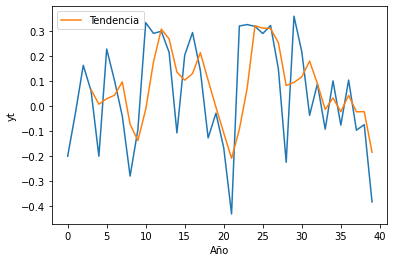

In [30]:
#tendencia
yt_dataframe = pd.DataFrame({'data' : yt_rate})

trend = running_average(yt_dataframe, 3)

fig, ax = plt.subplots(1, 1)
ax.plot(yt_dataframe.index, yt_dataframe['data'])
ax.set_xlabel('Año')
ax.set_ylabel('yt')
ax.plot(yt_dataframe.index[3:], trend, label='Tendencia')
ax.legend()

In [31]:
#estacionalidad
from statsmodels.tsa.seasonal import seasonal_decompose

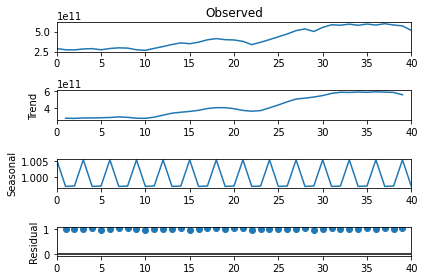

In [44]:
decompose_result = seasonal_decompose(y, model='multiplicative', period=3)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();